# Step 1: Import necessary libraries

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#other
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Step 2: Load Data

In [34]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [35]:
df_linear = df[['age','fare']]
df_linear

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [36]:
x=df[['age']]
y=df['fare']

In [37]:
df['age'].fillna(value=df['age'].mean(), inplace=True)

In [38]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


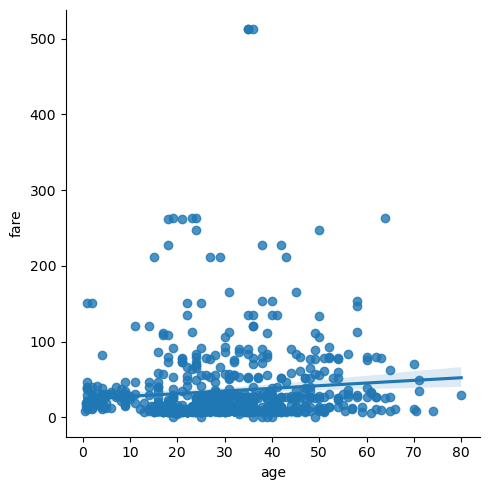

In [39]:
sns.lmplot(data=df_linear ,x='age',y='fare')

### Remove outlier throgh visulization

<Axes: ylabel='age'>

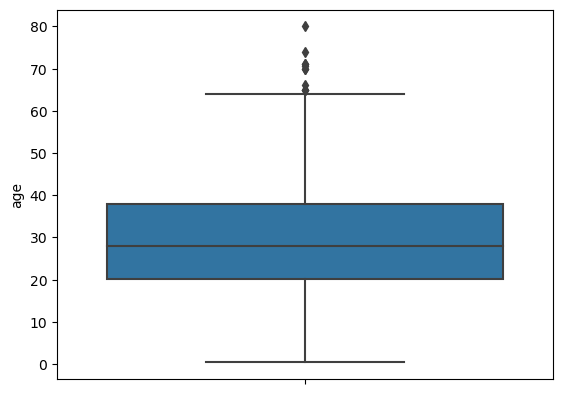

In [40]:
sns.boxplot(data=df_linear,y='age')

In [41]:
df_linear = df_linear[(df_linear['age']<60)]

In [42]:
df_linear

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
885,39.0,29.1250
886,27.0,13.0000
887,19.0,30.0000
889,26.0,30.0000


<Axes: ylabel='age'>

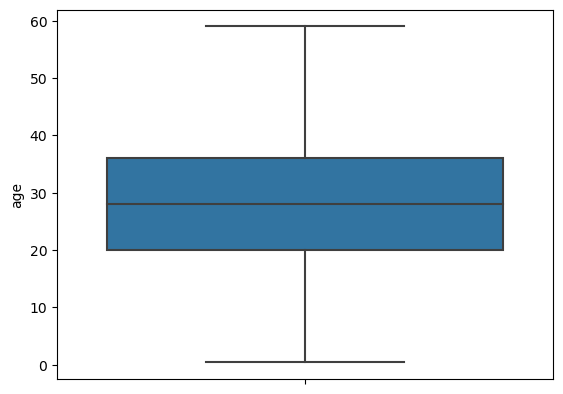

In [43]:
sns.boxplot(data=df_linear,y='age')

<Axes: ylabel='fare'>

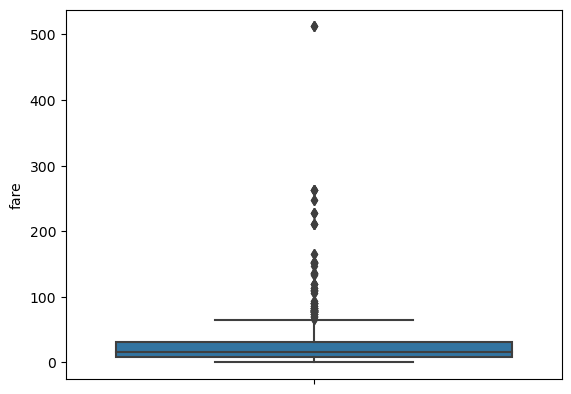

In [44]:
sns.boxplot(data=df_linear,y='fare')

In [45]:
df_linear = df_linear[(df_linear['fare']<100)]

<Axes: ylabel='fare'>

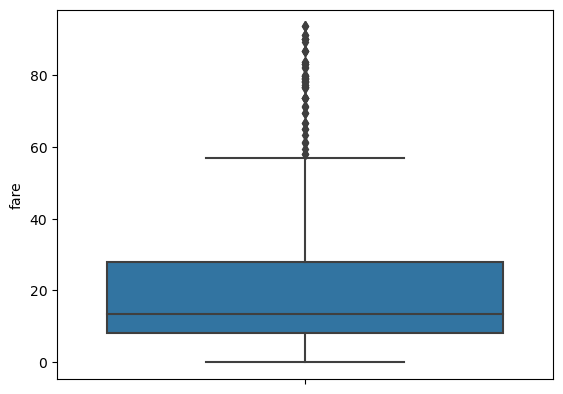

In [46]:
sns.boxplot(data=df_linear,y='fare')

In [47]:
df_linear = df_linear[(df_linear['fare']<50)]

<Axes: ylabel='fare'>

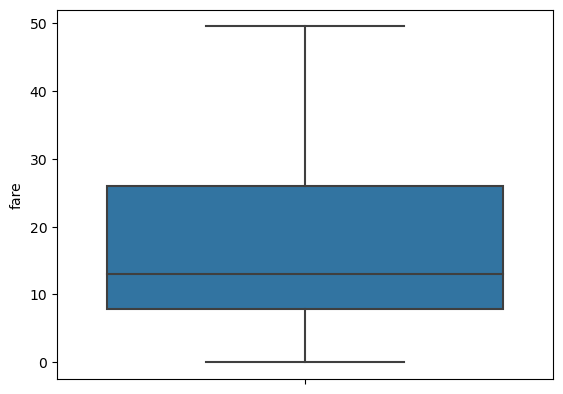

In [48]:
sns.boxplot(data=df_linear,y='fare')

In [49]:
x=df_linear[['age']]
y=df_linear['fare']

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


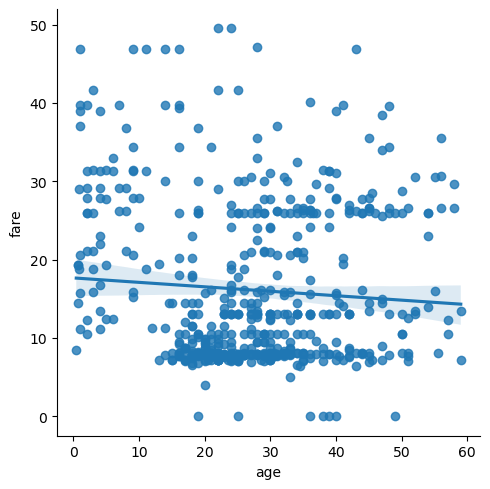

In [50]:
sns.lmplot(data=df_linear ,x='age',y='fare')

In [51]:
model = LinearRegression()

In [52]:
model.fit(x,y)

LinearRegression()

In [53]:
model.predict([[100]])

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11.98764714])

# Step 3: Split the data into training and testing sets

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [55]:
x_train.shape

(445, 1)

In [56]:
x_test.shape

(112, 1)

# # Step 4: Create a Linear Regression model

In [57]:
model = LinearRegression()

# Step 5: Train the model on the training set

In [58]:
model.fit(x_train,y_train)

LinearRegression()

# Step 6: Make predictions on the testing set

In [64]:
prediction=model.predict(x_test)

<Axes: xlabel='fare'>

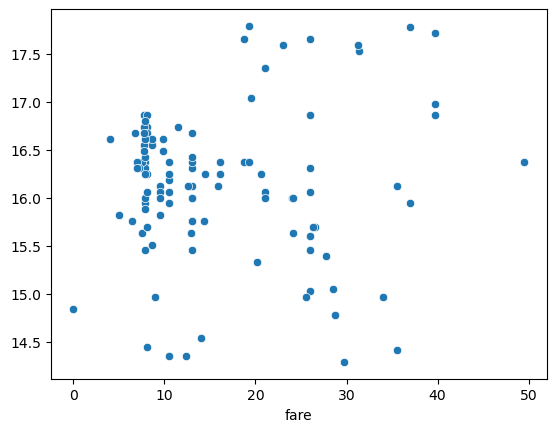

In [65]:
sns.scatterplot(x=y_test,y=predictions)

# Regression Evaluation Metrics:
    Mean Absolute Error (MAE)
    Mean Squared Error (MSE)
    Root Mean Squared Error (RMSE)
    R-squared (Coefficient of Determination)
    Mean Absolute Percentage Error (MAPE)

# Step 7: Evaluate the model

In [61]:
model.score(x_test,y_test)

0.000504546323586208

In [71]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [72]:
MAE=mean_absolute_error(y_true=y_test,y_pred=prediction)
MSE=mean_squared_error(y_true=y_test,y_pred=prediction)
RMSE=mean_squared_error(y_true=y_test,y_pred=prediction,squared=True)
R2=r2_score(y_true=y_test,y_pred=prediction)

In [73]:
print('MAE',MAE)
print('MSE',MSE)
print('RMSE',RMSE)
print('R_squared',R2)

MAE 8.25352292044124
MSE 97.52698535230579
RMSE 97.52698535230579
R_squared 0.000504546323586208


# Step 8: Visualize the regression line

In [1]:
sns.scatterplot(x_test\, y_test, color='black')
plt.plotx(x_test, y_pred, color='blue', linewidth=3)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()

SyntaxError: unexpected character after line continuation character (576443811.py, line 1)